<a href="https://colab.research.google.com/github/themightyNJ/MachineLearning/blob/master/sklearn_doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#libraries for feature engineering
import pandas as pd
import numpy as np
#libraries for data analysis and for plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#dataset is present in the sklearn library itself
from sklearn.datasets import load_wine
#reading the dataset from the library
wine = load_wine()
#library for splitting the data for training and testing
from sklearn.model_selection import train_test_split
#ML model that we are gonna use
from sklearn import svm
classifier = svm.SVC(kernel = "linear")
#library for checking accuracy
from sklearn.metrics import accuracy_score

In [2]:
#Description of the dataset
print(wine["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [27]:
#Converting the data into a dataframe
features = pd.DataFrame(data=wine["data"],columns=wine["feature_names"])
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [36]:
#pre-processing of data
#assigns class to the wine quality on the basis of their target
features["target"] = wine["target"]
features['class'] = features['target'].map(lambda ind: wine['target_names'][ind])
print(features["target"].head(),features["class"].head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64 0    class_0
1    class_0
2    class_0
3    class_0
4    class_0
Name: class, dtype: object


In [38]:
#final data
#notice target and class column at last
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [39]:
#stats of the data
features.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


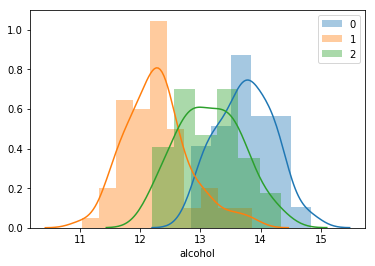

In [24]:
#classificaton of wine quality
for i in feat.target.unique():
    sns.distplot(feat['alcohol'][wine.target==i],kde=1,label='{}'.format(i))

plt.legend()
plt.show()

In [25]:
#Splitting the data for training and testing
#75% data is used for training purpose and rest of the 25% data is used for testing
data_train, data_test, label_train, label_test = train_test_split(wine['data'],wine['target'],test_size=0.25)
print(len(data_train),' samples in training data\n',len(data_test),' samples in test data\n')

133  samples in training data
 45  samples in test data



In [42]:
#training the model
classifier.fit(data_train,label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
#making predictons
predictions = classifier.predict(data_test)
print(predictions)

[2 2 1 2 2 1 2 1 1 2 2 2 1 1 2 0 2 1 0 1 2 2 1 1 2 2 1 1 2 2 1 2 1 2 1 0 1
 1 1 1 0 1 2 0 2]


In [46]:
#checking the accuracy
acc  = accuracy_score(label_test,predictions)
print("Accuracy : ",acc*100,"%")

Accuracy :  95.55555555555556 %
